In [ ]:
import os
from data_process import LabelDataReader, DataReader
#from models.model import UnetModel
from tool.config_utils import process_config
import numpy as np
import cv2

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
config = None

try:
    config = process_config('segmention_config2.json')
#    print(config)
except Exception as e:
    print('[Exception] Config Error, %s' % e)
    exit(0)
# np.random.seed(47)  # 固定随机数

In [ ]:
print('[INFO] Preparing Data...')
datareader = LabelDataReader(config=config)
datareader.init()

print('train aug task')
#no_list, lower_list, full_list, label_list= datareader.get_show_data()
no_list, lower_list, full_list, label_list= datareader.get_show_data()

In [ ]:
for i in range(1):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title("no_" + str(i))
    no_img = no_list[i] * 255.
    no_img = no_img.astype('float64')
    plt.imshow(no_img, cmap='gray')
    plt.axis('off') 
    
    plt.subplot(1,3,2)
    plt.title("lower_reg_" + str(i))
    lower_img = lower_list[i] * 255.
    lower_img = lower_img.astype('float64')
    plt.imshow(lower_img, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("truth_reg_" + str(i))
    full_img = full_list[i] *255.
    full_img = full_img.astype('float64')
    plt.imshow(full_img, cmap='gray')
    plt.axis('off')
    

In [ ]:
for i in range(1):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title("no_" + str(i))
    no_img = no_list[i] * 255.
    no_img = no_img.astype('float64')
    plt.hist(no_img, bins=255)
    plt.axis('off') 
    
    plt.subplot(1,3,2)
    plt.title("lower_reg_" + str(i))
    lower_img = lower_list[i] * 255.
    lower_img = lower_img.astype('float64')
    plt.hist(lower_img, bins=255)
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("truth_reg_" + str(i))
    full_img = full_list[i] *255.
    full_img = full_img.astype('float64')
    plt.hist(full_img, bins=255)
    plt.axis('off')


In [5]:
from tool.eval_utils import compute_psnr, compute_ssim
opsnr = list()
ossim = list()

In [6]:
for i in range(len(no_list)):
    no_img = no_list[i] 
    lower_img = lower_list[i] 
    full_img = full_list[i] 

    opsnr.append(compute_psnr(no_img, full_img))
    ossim.append(compute_ssim(no_img, full_img))

In [7]:
ndopsnr = np.asarray(opsnr)
ndossim = np.asarray(ossim)
print(ndopsnr.mean(), ndopsnr.std())
print(ndossim.mean(), ndossim.std())

32.3547200727 0.941915183539
0.683989108246 0.095109678661


In [7]:
from tool.eval_utils import compute_psnr, compute_ssim

In [8]:
opsnr = list()
ossim = list()

255
2.20675347222
11.5199817142
2.19602430556
11.4646964828
2.351875
12.2577244619


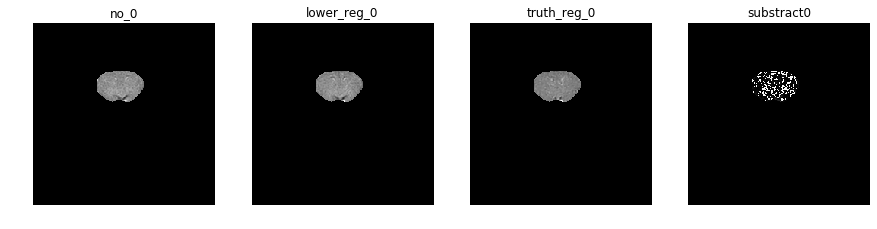

255
0.905069444444
7.23541507069
0.920868055556
7.35898132834
1.00189236111
7.97347685922


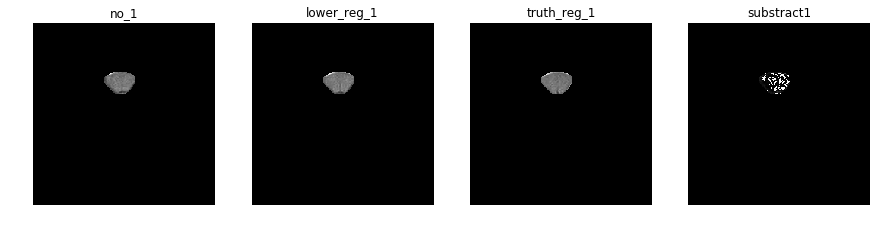

255
2.65977430556
12.450708088
2.6546875
12.4021501653
2.86230902778
13.3367879463


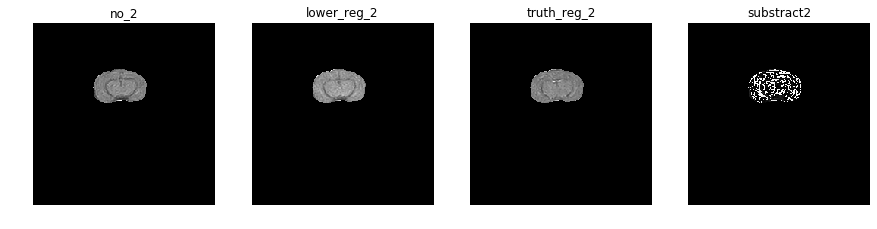

255
2.50642361111
12.1015262634
2.52710069444
12.1810700245
2.74152777778
13.2337346874


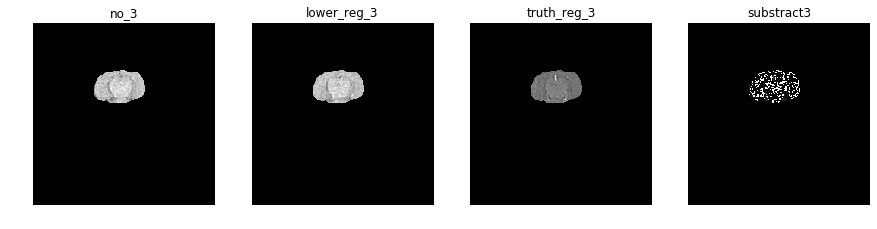

255
0.86890625
7.33140731229
0.855173611111
7.17313160229
0.988177083333
8.25431174005


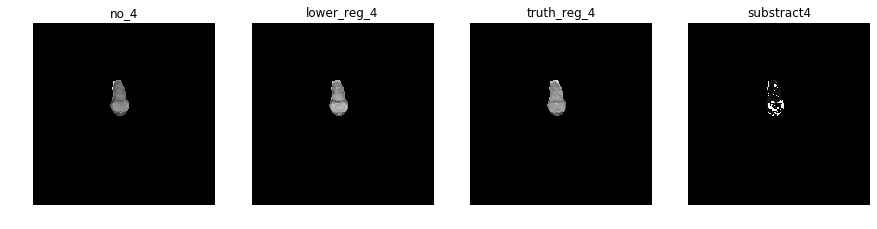

255
1.47536458333
9.35210263266
1.49430555556
9.44821423844
1.59685763889
10.0444374041


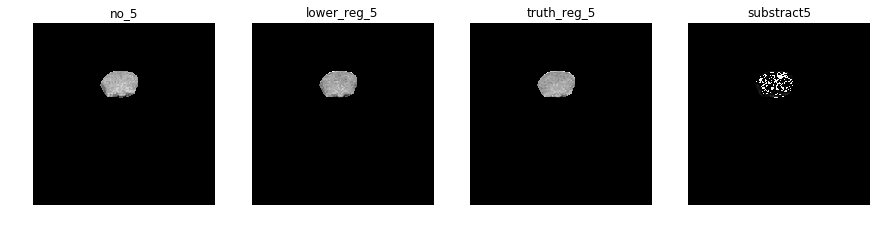

255
2.69048611111
12.590457411
2.67897569444
12.5264726205
2.87545138889
13.4328722576


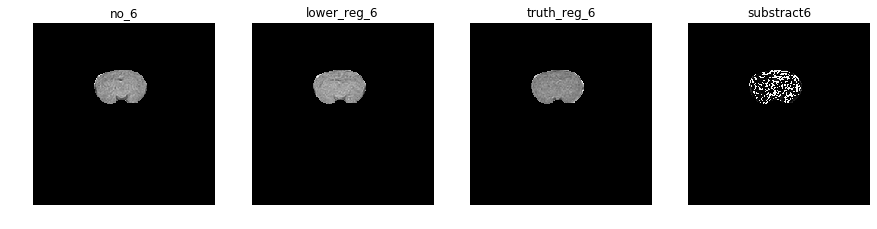

255
1.98564236111
10.8350216042
1.99625
10.8700173691
2.29376736111
12.5761998009


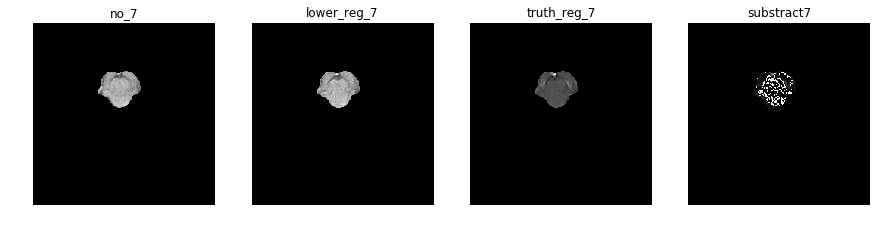

255
0.244340277778
3.61919831451
0.249340277778
3.68982500839
0.285399305556
4.17893469117


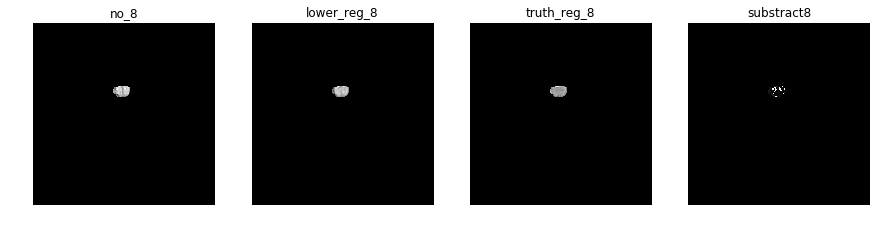

255
1.89180555556
10.8992846129
1.92746527778
11.0530436277
2.12638888889
12.1598581755


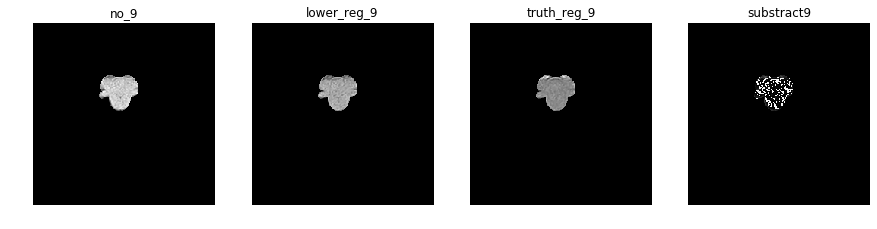

255
0.570902777778
5.71097024414
0.604600694444
6.07211834492
0.647586805556
6.49468447795


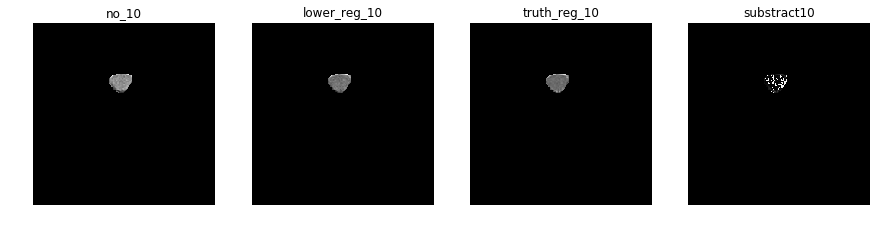

255
1.5325
9.83726542146
1.55413194444
9.93115819358
1.76574652778
11.1763081961


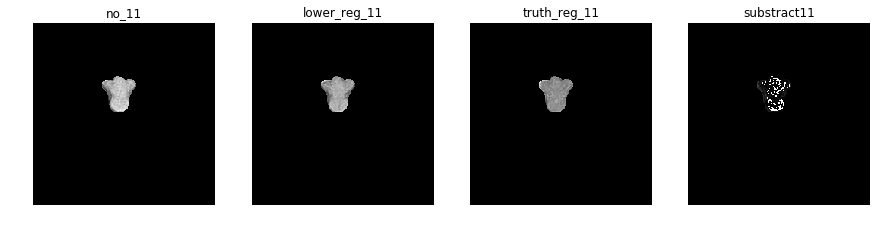

255
0.4015625
4.90981489272
0.411371527778
5.04297770772
0.468368055556
5.70143495369


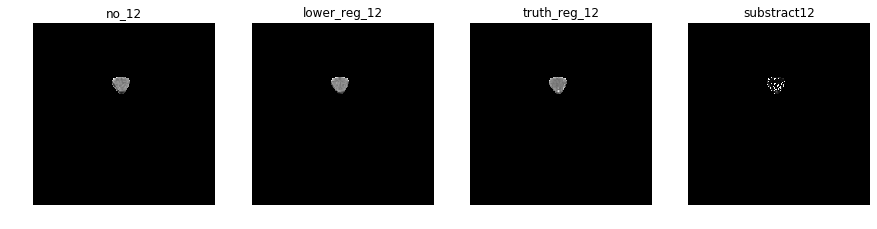

255
2.39010416667
11.7887086686
2.42822916667
11.9329414648
2.74489583333
13.454986361


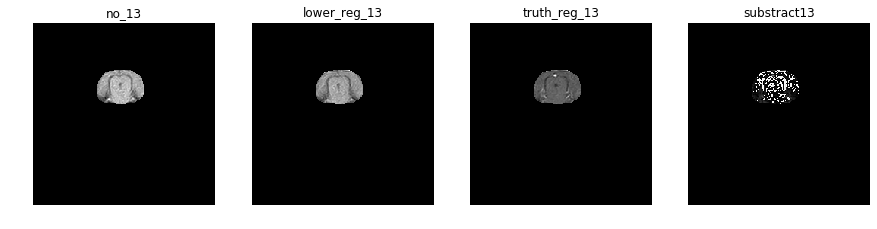

255
0.279253472222
4.86609087615
0.258628472222
4.27320911897
0.302760416667
4.8530902975


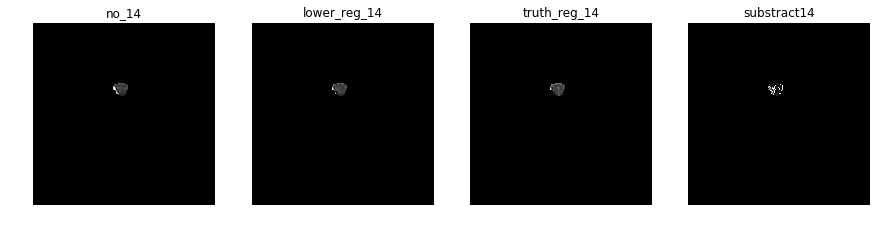

In [17]:
for i in range(len(no_list)):
    plt.figure(figsize=(15,5))
    plt.subplot(1,4,1)
    plt.title("no_" + str(i))
    no_img = no_list[i] * (label_list[i]/255.)
    print(np.max(label_list[i]))
    print(np.mean(no_img))
    print(np.std(no_img))
    norm0 = 1
    no_img = no_img.astype('float64')
    plt.imshow(no_img, cmap='gray')
    plt.axis('off') 
    
    plt.subplot(1,4,2)
    plt.title("lower_reg_" + str(i))
    lower_img = lower_list[i] * (label_list[i]/255.)
    norm1 = np.mean(no_img)/np.mean(lower_img)
    lower_img = lower_img*norm0
    print(np.mean(lower_img))
    print(np.std(lower_img))
    plt.imshow(lower_img, cmap='gray')
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.title("truth_reg_" + str(i))
    full_img = full_list[i] * (label_list[i]/255.)
    norm2 = np.mean(no_img)/np.mean(full_img)
    full_img = full_img*norm0
    print(np.mean(full_img))
    print(np.std(full_img))
    plt.imshow(full_img, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1,4,4)
    plt.title("substract" + str(i))
    sub_img = cv2.subtract(full_img, no_img) * (label_list[i]/255.)
    sub_img = sub_img.astype('uint8')
    plt.imshow(sub_img, cmap='gray')
    opsnr.append(compute_psnr(no_img, full_img))
    ossim.append(compute_ssim(no_img, full_img))
    plt.axis('off')
    plt.show()

In [ ]:
ndopsnr = np.asarray(opsnr)
ndossim = np.asarray(ossim)

In [ ]:
print(ndopsnr.mean(), ndopsnr.std())
print(ndossim.mean(), ndossim.std())

In [ ]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"